In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import gc

In [27]:
grid_df = pd.read_pickle('../data/input/grid_2015.pkl')
grid_df = grid_df.sample(frac=0.01)
grid_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,price_momentum,price_momentum_m,price_momentum_y,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end
34925134,HOBBIES_1_062_WI_2_validation,HOBBIES_1_062,HOBBIES_1,HOBBIES,WI_2,WI,1548,0.0,221,0.970215,0.970215,0.970215,0.000000,0.970215,1.000000,1.0,83,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,0,0,0,25,17,4,4,4,5,1
34888317,FOODS_3_197_TX_2_validation,FOODS_3_197,FOODS_3,FOODS,TX_2,TX,1547,0.0,136,1.980469,1.980469,1.759766,0.078674,1.947266,1.000000,2.0,214,1.0,1.019531,1.000000,NaN,NaN,NaN,NaN,0,0,0,24,17,4,4,4,4,0
38490703,HOUSEHOLD_2_506_TX_2_validation,HOUSEHOLD_2_506,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,1666,1.0,145,6.968750,6.968750,6.500000,0.221558,6.816406,1.000000,2.0,69,1.0,1.023438,1.000000,NaN,NaN,NaN,NaN,0,0,0,21,34,8,4,3,4,0
31740216,FOODS_2_319_CA_4_validation,FOODS_2_319,FOODS_2,FOODS,CA_4,CA,1442,0.0,32,2.679688,2.980469,1.879883,0.132935,2.792969,0.899414,4.0,109,1.0,1.007812,0.956543,NaN,NaN,NaN,NaN,1,1,1,9,2,1,4,2,4,0
39939388,HOBBIES_1_040_CA_3_validation,HOBBIES_1_040,HOBBIES_1,HOBBIES,CA_3,CA,1714,0.0,118,12.968750,13.476562,11.882812,0.246826,12.921875,0.962402,4.0,17,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,1,0,1,8,41,10,4,2,3,0


In [28]:
grid_df.shape

(110299, 34)

In [29]:
grid_df.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'release', 'sell_price', 'price_max', 'price_min', 'price_std',
       'price_mean', 'price_norm', 'price_nunique', 'item_nunique',
       'price_momentum', 'price_momentum_m', 'price_momentum_y',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'tm_d', 'tm_w', 'tm_m', 'tm_y',
       'tm_wm', 'tm_dw', 'tm_w_end'],
      dtype='object')

In [30]:
grid_df.state_id.unique()

[WI, TX, CA]
Categories (3, object): [WI, TX, CA]

In [31]:
grid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110299 entries, 34925134 to 34548051
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                110299 non-null  category
 1   item_id           110299 non-null  category
 2   dept_id           110299 non-null  category
 3   cat_id            110299 non-null  category
 4   store_id          110299 non-null  category
 5   state_id          110299 non-null  category
 6   d                 110299 non-null  int16   
 7   sales             110299 non-null  float64 
 8   release           110299 non-null  int16   
 9   sell_price        110299 non-null  float16 
 10  price_max         110299 non-null  float16 
 11  price_min         110299 non-null  float16 
 12  price_std         110299 non-null  float16 
 13  price_mean        110299 non-null  float16 
 14  price_norm        110299 non-null  float16 
 15  price_nunique     110299 non-null  float16

In [32]:
grid_df[(grid_df['event_name_1'].isnull()) | (grid_df['event_name_1']!='Christmas')].shape

(110034, 34)

In [33]:
grid_may_june = grid_df[(grid_df.tm_m==5)|(grid_df.tm_m==6)]

In [34]:
grid_may_june.event_name_1.unique()

[NaN, Ramadan starts, Cinco De Mayo, Father's day, NBAFinalsStart, MemorialDay, NBAFinalsEnd, Mother's day]
Categories (7, object): [Ramadan starts, Cinco De Mayo, Father's day, NBAFinalsStart, MemorialDay, NBAFinalsEnd, Mother's day]

In [35]:
grid_df.groupby(['store_id', 'item_id'])['sell_price'].apply(lambda x: round(x, 1).mode())

store_id  item_id           
CA_1      FOODS_1_001      0     2.199219
          FOODS_1_002      0     9.500000
          FOODS_1_003      0     3.199219
          FOODS_1_004      0     2.000000
          FOODS_1_005      0     3.500000
                                  ...    
WI_3      HOUSEHOLD_2_512  0     4.000000
          HOUSEHOLD_2_513  0     2.800781
          HOUSEHOLD_2_514  0    19.593750
          HOUSEHOLD_2_515  0     2.000000
          HOUSEHOLD_2_516  0     5.898438
Name: sell_price, Length: 30489, dtype: float16

In [36]:
################# climate #####################3
climate_ca = pd.read_csv('../data/input/climate/datasets_703615_1229380_californiaw.csv')
climate_tx = pd.read_csv('../data/input/climate/datasets_703615_1229380_texasw.csv')
climate_wi = pd.read_csv('../data/input/climate/datasets_703615_1229380_wisconsinw.csv')
print(climate_ca.shape, climate_tx.shape, climate_wi.shape)

(2000, 15) (2000, 15) (2000, 15)


In [37]:
climate_tx.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure
0,2011-01-29,18,13,0.0,6.8,1,13,16,16,16,26,55,83,0.0,1018
1,2011-01-30,18,16,0.0,6.8,1,16,17,17,17,28,81,94,15.5,1017
2,2011-01-31,18,15,0.0,5.2,1,15,16,16,16,27,65,93,0.2,1015
3,2011-02-01,18,0,0.0,8.4,1,8,7,10,7,45,62,89,4.9,1013
4,2011-02-02,3,-3,0.0,10.5,1,-6,-6,0,-6,31,10,65,0.0,1029


In [39]:
import re
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
climate_ca['month'] = climate_ca.date_time.apply(lambda x: month_dict[x.split()[0]])
climate_ca['date'] = climate_ca.date_time.apply(lambda x: int(x.split()[1][:-1]))
climate_ca['year'] = climate_ca.date_time.apply(lambda x: int(x.split()[-1]) )
climate_ca['year'] = climate_ca['year'] - climate_ca['year'].min()
climate_ca['state_id'] = 'CA'
climate_ca.drop(columns=['date_time'], inplace=True)

In [40]:
#climate_wi['date_time'] = pd.to_datetime(climate_wi['date_time'])
climate_wi['month'] = climate_wi['date_time'].apply(lambda x: int(x.split('-')[1]))
climate_wi['date'] = climate_wi['date_time'].apply(lambda x: int(x.split('-')[0]))
climate_wi['year'] = climate_wi['date_time'].apply(lambda x: int(x.split('-')[2]))
climate_wi['year'] = climate_wi['year'] - climate_wi['year'].min()
climate_wi['state_id'] = 'WI'
climate_wi.drop(columns=['date_time'], inplace=True)

In [41]:
#climate_tx['date_time'] = pd.to_datetime(climate_tx['date_time'])
climate_tx['month'] = climate_tx['date_time'].apply(lambda x: int(x.split('-')[1]))
climate_tx['date'] = climate_tx['date_time'].apply(lambda x: int(x.split('-')[2]))
climate_tx['year'] = climate_tx['date_time'].apply(lambda x: int(x.split('-')[0]))
climate_tx['year'] = climate_tx['year'] - climate_tx['year'].min()
climate_tx['state_id'] = 'TX'
climate_tx.drop(columns=['date_time'], inplace=True)

In [42]:
climate = pd.concat([climate_ca, climate_tx, climate_wi], axis=0)
climate.shape

(6000, 18)

In [52]:
climate[climate.state_id == 'TX'].head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,month,date,year,state_id
0,18,13,0.0,6.8,1,13,16,16,16,26,55,83,0.0,1018,1,29,0,TX
1,18,16,0.0,6.8,1,16,17,17,17,28,81,94,15.5,1017,1,30,0,TX
2,18,15,0.0,5.2,1,15,16,16,16,27,65,93,0.2,1015,1,31,0,TX
3,18,0,0.0,8.4,1,8,7,10,7,45,62,89,4.9,1013,2,1,0,TX
4,3,-3,0.0,10.5,1,-6,-6,0,-6,31,10,65,0.0,1029,2,2,0,TX


In [45]:
grid_df = pd.merge(grid_df, climate, left_on=['state_id', 'tm_y', 'tm_m', 'tm_d'], right_on=['state_id', 'year', 'month', 'date'], how='left')
grid_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,price_momentum,price_momentum_m,price_momentum_y,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,month,date,year
0,HOBBIES_1_062_WI_2_validation,HOBBIES_1_062,HOBBIES_1,HOBBIES,WI_2,WI,1548,0.0,221,0.970215,0.970215,0.970215,0.000000,0.970215,1.000000,1.0,83,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,0,0,0,25,17,4,4,4,5,1,10,2,0.0,12.2,1,-3,2,6,2,31,55,58,0.0,1013,4,25,4
1,FOODS_3_197_TX_2_validation,FOODS_3_197,FOODS_3,FOODS,TX_2,TX,1547,0.0,136,1.980469,1.980469,1.759766,0.078674,1.947266,1.000000,2.0,214,1.0,1.019531,1.000000,NaN,NaN,NaN,NaN,0,0,0,24,17,4,4,4,4,0,26,23,0.0,9.1,1,23,27,27,25,25,45,90,0.0,1011,4,24,4
2,HOUSEHOLD_2_506_TX_2_validation,HOUSEHOLD_2_506,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,1666,1.0,145,6.968750,6.968750,6.500000,0.221558,6.816406,1.000000,2.0,69,1.0,1.023438,1.000000,NaN,NaN,NaN,NaN,0,0,0,21,34,8,4,3,4,0,30,27,0.0,11.6,1,24,33,33,29,16,21,76,0.7,1014,8,21,4
3,FOODS_2_319_CA_4_validation,FOODS_2_319,FOODS_2,FOODS,CA_4,CA,1442,0.0,32,2.679688,2.980469,1.879883,0.132935,2.792969,0.899414,4.0,109,1.0,1.007812,0.956543,NaN,NaN,NaN,NaN,1,1,1,9,2,1,4,2,4,0,17,9,0.0,8.7,1,-6,12,13,12,9,25,28,0.0,1015,1,9,4
4,HOBBIES_1_040_CA_3_validation,HOBBIES_1_040,HOBBIES_1,HOBBIES,CA_3,CA,1714,0.0,118,12.968750,13.476562,11.882812,0.246826,12.921875,0.962402,4.0,17,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,1,0,1,8,41,10,4,2,3,0,31,20,0.0,11.6,1,5,24,24,25,17,9,30,0.0,1017,10,8,4


In [50]:
grid_df[grid_df.state_id == 'WI'].head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,release,sell_price,price_max,price_min,price_std,price_mean,price_norm,price_nunique,item_nunique,price_momentum,price_momentum_m,price_momentum_y,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,tm_d,tm_w,tm_m,tm_y,tm_wm,tm_dw,tm_w_end,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,month,date,year
0,HOBBIES_1_062_WI_2_validation,HOBBIES_1_062,HOBBIES_1,HOBBIES,WI_2,WI,1548,0.0,221,0.970215,0.970215,0.970215,0.000000,0.970215,1.000000,1.0,83,1.0,1.000000,1.0,NaN,NaN,NaN,NaN,0,0,0,25,17,4,4,4,5,1,10,2,0.0,12.2,1,-3,2,6,2,31,55,58,0.0,1013,4,25,4
8,HOUSEHOLD_1_205_WI_2_validation,HOUSEHOLD_1_205,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,1717,0.0,310,5.941406,5.968750,5.941406,0.011642,5.945312,0.995117,2.0,47,1.0,1.000000,1.0,NaN,NaN,NaN,NaN,0,1,1,11,41,10,4,2,6,1,26,12,0.0,11.1,1,10,17,18,17,42,1,60,0.0,1002,10,11,4
11,HOBBIES_1_302_WI_1_validation,HOBBIES_1_302,HOBBIES_1,HOBBIES,WI_1,WI,1547,0.0,2,2.880859,2.880859,2.880859,0.000000,2.880859,1.000000,1.0,144,1.0,1.000000,1.0,NaN,NaN,NaN,NaN,0,0,0,24,17,4,4,4,4,0,11,0,0.0,9.2,1,-2,2,5,2,25,57,59,0.1,1016,4,24,4
12,HOUSEHOLD_2_050_WI_3_validation,HOUSEHOLD_2_050,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,1671,0.0,19,8.476562,8.476562,6.269531,0.948242,7.320312,1.000000,4.0,15,1.0,1.148438,1.0,NaN,NaN,NaN,NaN,0,0,0,26,35,8,4,4,2,0,23,10,0.0,11.6,1,9,14,15,14,21,15,70,0.0,1020,8,26,4
13,FOODS_3_520_WI_2_validation,FOODS_3_520,FOODS_3,FOODS,WI_2,WI,1602,0.0,114,3.980469,3.980469,3.980469,0.000000,3.980469,1.000000,1.0,149,1.0,1.000000,1.0,Ramadan starts,Religious,NaN,NaN,0,0,0,18,25,6,4,3,3,0,24,16,0.0,13.5,1,15,19,20,19,25,40,79,0.2,1014,6,18,4


In [47]:
grid_df.state_id.unique()

array(['WI', 'TX', 'CA'], dtype=object)

In [48]:
grid_df.shape

(110299, 51)

<Figure size 432x288 with 0 Axes>

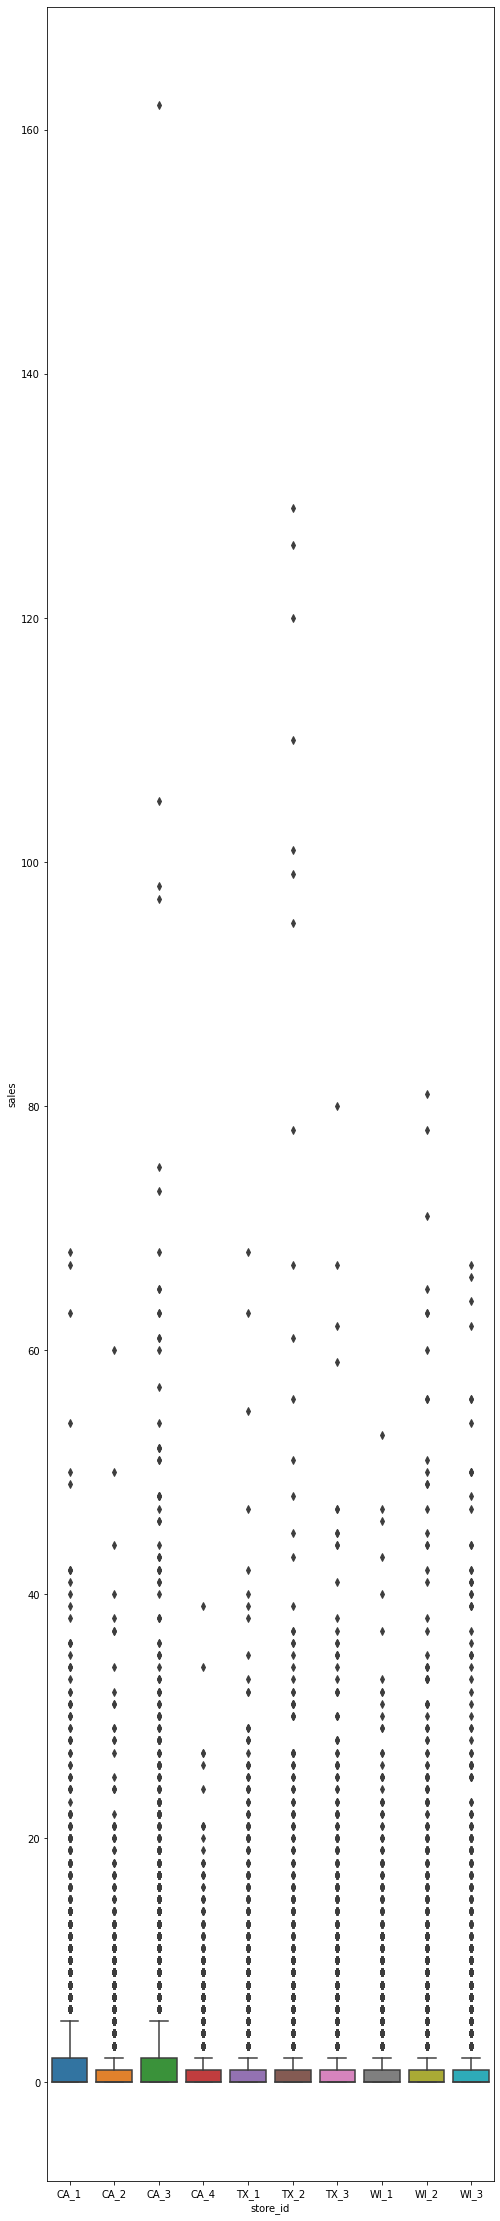

In [61]:
fig = plt.figure()
plt.figure(figsize=(8, 40))
sns.boxplot(x=grid_df.store_id, y=grid_df.sales)
plt.show()